In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ee, geemap

from fse_toolkit.settings import EE_ACCOUNT, EE_PRIVATE_KEY_FILE
from fse_toolkit.utils.common import read_tif
from fse_toolkit.multispectral.utils import set_date_range
from fse_toolkit.multispectral.water_stress import *

ee.Initialize(
    credentials=ee.ServiceAccountCredentials(
        EE_ACCOUNT, 
        str(EE_PRIVATE_KEY_FILE)
    )
)

In [2]:
tif_files = [
    '../../../FPAR/To彥成/95183018_221211e_28~6584_hr4-003.tif',
    '../../../FPAR/To彥成/95183020_221120f_30~0012_hr4.tif',
    '../../../FPAR/To彥成/95183029_221120f_29~0113_hr4.tif',
    '../../../FPAR/To彥成/95183038_221211e_28~6592_hr4-019.tif',
    '../../../FPAR/To彥成/95183040_221120f_30~0004_hr4.tif',
    '../../../FPAR/To彥成/95183049_221120f_29~0121_hr4.tif'
]

In [3]:
tif_data = read_tif(tif_files[1])

影像的地理變換矩陣: | 0.25, 0.00, 222430.00|
| 0.00,-0.25, 2513820.00|
| 0.00, 0.00, 1.00|
影像的座標參考系統: EPSG:3826


In [4]:
tif_data['coordinates']

{'top': 22.724665486010863,
 'left': 120.73159860174978,
 'bottom': 22.697029906814606,
 'right': 120.75953829891512,
 'center': (22.710847696412735, 120.74556845033246)}

In [5]:
# aoi from tif_data['coordinates']
aoi = ee.Geometry.BBox(tif_data['coordinates']['left'], tif_data['coordinates']['bottom'], tif_data['coordinates']['right'], tif_data['coordinates']['top'])

In [6]:
# Set the date range for August of three adjacent years
# start_date = '2022-08-01'
# end_date = '2024-08-31'
year_now = 2024
start_date, end_date = set_date_range(year_now, month=8, years=3)

start_date, end_date

('2022-08-01', '2024-08-31')

In [7]:
water_stress = calculate_water_stress(tif_data['coordinates'], start_date, end_date, output_numpy=True)
wstress_value = np.nanmean(water_stress)
print("water stress (Mean):", wstress_value)

water stress (Mean): 0.95572966


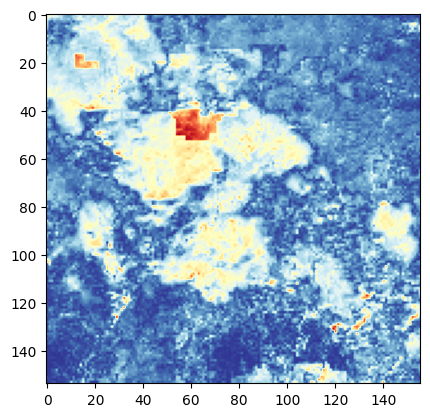

In [8]:
plt.imshow(water_stress, cmap='RdYlBu')
plt.show()